In [2]:
import numpy as np
import dicom
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import sklearn, sklearn.preprocessing
%matplotlib inline

In [3]:
def cropHeart(inp):
    """
    Crop the heart so that all the padding is done away with.
    Output cropped heart.
    """
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(inp)
    # take the smallest points and use them as the top left of your crop
    top_left = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    bottom_right = true_points.max(axis=0)
    out = inp[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1,   # inclusive
          top_left[2]:bottom_right[2]+1]  
    print(out.shape, "cropped from", inp.shape)
    return out

def plotHeart(inData, cols):
    fig, ax = plt.subplots(cols,cols)
    k = 0
    fig.suptitle("Slices of heart data")
    for i in np.arange(cols):
        for j in np.arange(cols):
            ax[i,j].imshow(inData[k])
            ax[i,j].axis("off")
            k = k + inData.shape[0]/(cols**2) +1
    print(k)
    
def normalise(inData):
    """
    Normalise 3D data slice by slice.
    """
    croppednorm = np.zeros((inData.shape[0], inData.shape[1], inData.shape[2]))
    for i in np.arange(inData.shape[0]):
        croppednorm[i] = sklearn.preprocessing.normalize(inData[i], axis=0)
    return croppednorm

In [4]:
ds0 = dicom.read_file("./data/nlst/7/RESTRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.149242122.1391620200.dcm")
px0 = ds0.pixel_array

ds1 = dicom.read_file("./data/nlst/7/STRESSRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.1793586668.13916201980.dcm")
px1 = ds1.pixel_array

In [5]:
cropped = cropHeart(px1)
croppednorm = normalise(cropped)
#plotHeart(cropped, 3)
cropped0 = cropHeart(px0)

((23, 15, 23), 'cropped from', (37, 64, 64))
((23, 16, 22), 'cropped from', (36, 64, 64))


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


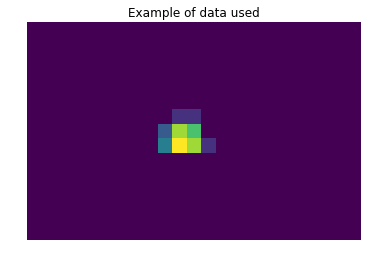

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = cropped[0]

def animate(i):
    data = cropped[i]
    return ax.imshow(data)

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(cropped.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example.mp4")

In [7]:
from mayavi import mlab
"""
newcrop = cropped0[10:]

x, y, z = np.nonzero(newcrop)
s = newcrop[np.nonzero(newcrop)]

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, s, transparent=True, scale_mode='scalar', mode="cube", \
                    scale_factor=0.007, vmin=30)
                    
mlab.axes()
mlab.show()"""

'\nnewcrop = cropped0[10:]\n\nx, y, z = np.nonzero(newcrop)\ns = newcrop[np.nonzero(newcrop)]\n\n# Plot scatter with mayavi\nfigure = mlab.figure(\'DensityPlot\')\npts = mlab.points3d(x, y, z, s, transparent=True, scale_mode=\'scalar\', mode="cube",                     scale_factor=0.007, vmin=30)\n                    \nmlab.axes()\nmlab.show()'

In [10]:
mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(cropped),
                            plane_orientation='x_axes',
                            slice_index=cropped.shape[0]/2,
                        )
mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(cropped),
                            plane_orientation='y_axes',
                            slice_index=cropped.shape[1]/2,
                        )

mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(cropped),
                            plane_orientation='z_axes',
                            slice_index=cropped.shape[2]/2,
                        )
mlab.axes()
mlab.show()

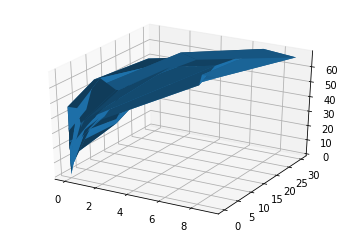

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(cropped0[0],cropped0[1],cropped0[2])

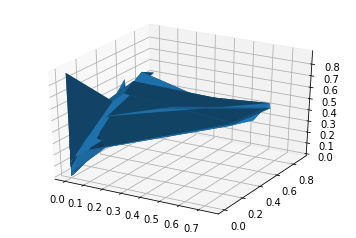

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(croppednorm[0],croppednorm[1],croppednorm[2])